In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
base = pd.read_csv('Datasets/vgsales.csv')

In [3]:
base

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
len(base)

16598

In [5]:
base.drop_duplicates(inplace=True)
len(base)

16598

In [6]:
base.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
base.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
base.dropna(inplace=True)

In [9]:
base.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
base['Year'] = base['Year'].astype(int) 


In [11]:
unique_platforms = base['Platform'].unique()
print(len(unique_platforms))


31


In [12]:
import altair as alt

# Utilizamos pivot_table para reorganizar los datos
sales_by_platform_year = base.pivot_table(index='Year', columns='Platform', aggfunc='size', fill_value=0)

# Reiniciamos el índice para que Year sea una columna
sales_by_platform_year.reset_index(inplace=True)

# Convertimos Year a tipo string
sales_by_platform_year['Year'] = sales_by_platform_year['Year'].astype(str)

# Derretimos los datos para hacerlos adecuados para Altair
sales_by_platform_year_melted = sales_by_platform_year.melt(id_vars='Year', var_name='Platform', value_name='Sales')

# Creamos el gráfico interactivo utilizando Altair
chart = alt.Chart(sales_by_platform_year_melted).mark_bar().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Sales:Q', title='Sales'),
    color=alt.Color('Platform:N', title='Platform', legend=alt.Legend(orient='right', symbolLimit=500))
).properties(
    width=600,
    height=400,
    title='Sales by Platform and Year'
)

chart


alt.Chart(...)

In [13]:
import matplotlib.pyplot as plt

def top_videoGames(year):

    df_filtered_year = base[base['Year'] == year]
            
    # Ordenar los datos por ventas globales en orden descendente
    df_sorted_year = df_filtered_year.sort_values(by='Global_Sales', ascending=False)
    
    # Seleccionar los 5 juegos con las mayores ventas globales para ese año
    top_5_games_year = df_sorted_year.head(5)
    
    # Crear el gráfico de barras horizontales para el top 5 de juegos más vendidos para ese año
    plt.figure(figsize=(16, 16))
    plt.barh(top_5_games_year['Name'], top_5_games_year['Global_Sales'], color='skyblue')
    plt.xlabel('Global Sales (millions)')
    plt.ylabel('Video games')
    plt.title(f'Top 5 of the Best Video Games and Their Global Sales in {year}')
    plt.gca().invert_yaxis()  # Invertir el eje y para que el juego con más ventas esté en la parte superior

    # Mostrar valores en las barras
    for i, v in enumerate(top_5_games_year['Global_Sales']):
        plt.text(v, i, f'{v}M', ha='left', va='center', color='black', fontsize=10)

    # Guardar el gráfico como una imagen
    plt.savefig(f'Images/bar_chart_top_5_{year}.png')
    plt.close()
    return

In [14]:
def pie_chart_images(year):
    filtered_by_year = base[base['Year']==year]
    amount_genre = filtered_by_year.groupby(by='Genre').count()[['Rank']].reset_index()
    amount_genre.columns = ['Genre','Amount'] 
    amount_genre 

    plt.figure(figsize=(8, 8))  # Configura el tamaño del gráfico
    plt.pie(amount_genre['Amount'], labels=amount_genre['Genre'], autopct='%1.1f%%', startangle=140)  # Crea el diagrama de pastel
    plt.title(f'Video Game Genre Sales Distribution in {year}')
    plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse

    # Mostrar el gráfico
    plt.savefig(f'Images/pie_chart_genres_{year}.png')      
    plt.close()
    return


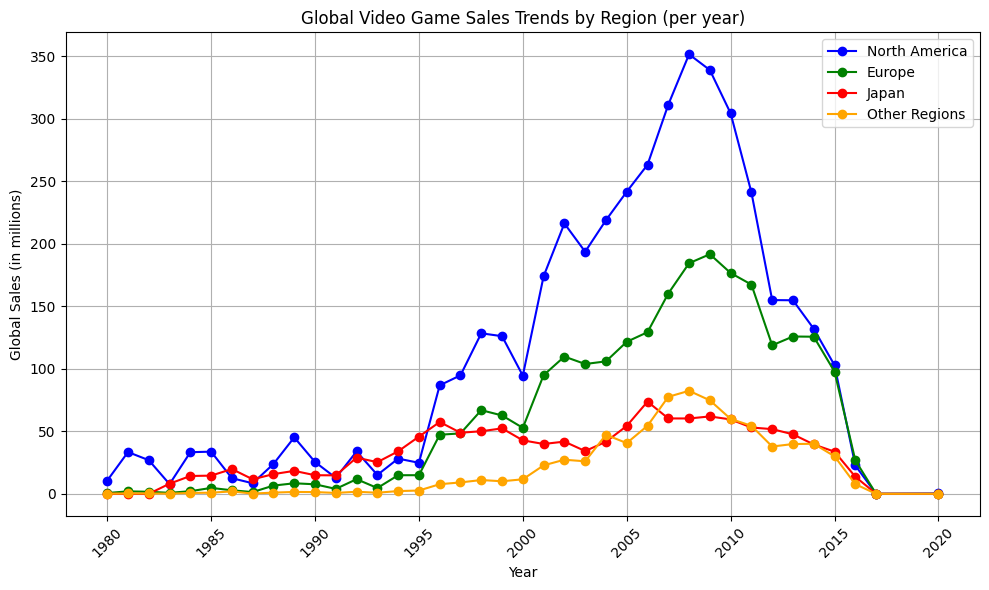

In [15]:
sales_by_region_year = base.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_by_region_year.index, sales_by_region_year['NA_Sales'], label='North America', marker='o', color='blue')
plt.plot(sales_by_region_year.index, sales_by_region_year['EU_Sales'], label='Europe', marker='o', color='green')
plt.plot(sales_by_region_year.index, sales_by_region_year['JP_Sales'], label='Japan', marker='o', color='red')
plt.plot(sales_by_region_year.index, sales_by_region_year['Other_Sales'], label='Other Regions', marker='o', color='orange')
plt.title('Global Video Game Sales Trends by Region (per year)')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(f'Images/Global Video Game Sales Trends by Region.png')      


In [16]:
from fpdf import FPDF

class PDFWithBackground(FPDF):
    def __init__(self):
        super().__init__()
        self.background = None

    def set_background(self, image_path):
        self.background = image_path

    def add_page(self, orientation=''):
        super().add_page(orientation)
        if self.background:
            self.image(self.background, 0, 0, self.w, self.h)

    def footer(self):
        # Posición a 1.5 cm desde el fondo
        self.set_y(-15)
        # Configurar la fuente para el pie de página
        self.set_font('Arial', 'I', 8)
        # Número de página
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

In [17]:
pdf = PDFWithBackground()
pdf.set_background('Images/background.png')

pdf.add_page()

pdf.set_y(100)
pdf.set_font('Courier',style='B',size=57)
pdf.cell(0,0,'Reporte',0,1,'C')

pdf.set_y(125)
pdf.set_font('Courier',style='B',size=57)
pdf.cell(0,0,'automático en',0,1,'C')

pdf.set_y(150)
pdf.set_font('Courier',style='B',size=57)
pdf.cell(0,0,'Python',0,1,'C')

pdf.set_y(170)
pdf.set_font('Courier',size=27)
pdf.cell(0,0,'Curso de Python',0,1,'C')

pdf.set_y(180)
pdf.set_font('Courier',size=17)
pdf.cell(0,0,'Desde aspectos básicos hasta aplicaciones analíticas',0,1,'C')

pdf.add_page()

pdf.set_y(50)
pdf.set_font('Courier',style='B',size=27)   # Arial, Times, Courier
pdf.cell(0,0,'Videogames Report',0,1,'R')

pdf.set_y(75)
pdf.set_font('Courier','B',size=20)   # Arial, Times, Courier
pdf.cell(0,0,'',0,1,'R')

pdf.set_y(155)
pdf.set_font('Courier',size=15) 
pdf.multi_cell(190,6,'This report presents an analysis of video game sales in recent years, exploring trends in the industry and how different factors impact game sales and reception. Key statistics on global video game sales are examined, as well as changes in consumer preferences over time. This analysis provides a clear insight into the dynamic relationship between video game production and its audience, offering relevant information to understand the market and guide future development and marketing strategies.',0,1,'L')
base['Year'] = base['Year'].astype(int) 
years = [i for i in range(2015,2016)]
pdf.add_page()
pdf.set_y(50)
pdf.set_font('Courier',style='B',size=27)   # Arial, Times, Courier
pdf.cell(0,0,'Videogames Report',0,1,'C')
pdf.image(f'Images/sales_by_platform_year.png',x=10,y=75,w=200,h=150)

for year in years:
    try:
        pie_chart_images(year)
        top_videoGames(year)
        pdf.add_page()

        pdf.set_y(45)
        pdf.set_font('Courier',style='B',size=23)   # Arial, Times, Courier
        pdf.cell(0,0,f'',0,1,'R')
        
        pdf.cell(0,0,f'Report year {year}',0,1,'C')
        
        pdf.image(f'Images/pie_chart_genres_{year}.png',x=50,y=50,w=120,h=120)
        pdf.image(f'Images/bar_chart_top_5_{year}.png',x=50,y=160,w=120,h=120)

    except:
        print(f'The {year} don\'t exist in the data')

pdf.output("Reports/Test_PDF.pdf")

In [ ]:
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill
from openpyxl.drawing.image import Image

# Crear un nuevo libro y seleccionar la hoja activa
wb = Workbook()
ws = wb.active

year = 2010

# Añadir texto a una celda
ws['E1'] = f"Reporte Personalizado {year}"

# Establecer fuente, tamaño y color
ws['E1'].font = Font(name='Amercian Typewriter', size=20, bold=True, italic=True, color='FFFFFF')

# Ajustar el tamaño de la celda
ws.row_dimensions[1].height = 60
ws.column_dimensions['E'].width = 60

# Alinear el texto
ws['E1'].alignment = Alignment(horizontal='center', vertical='center')

# Aplicar un color de fondo a una celda
ws['E1'].fill = PatternFill(start_color='050505', end_color='050505', fill_type='solid')

# Agregar la primera imagen
img1 = Image(f'Images/pie_chart_genres_{year}.png')
ws.add_image(img1, 'A6')  # Cambiar la posición vertical de la primera imagen

# Agregar la segunda imagen
img2 = Image(f'Images/bar_chart_top_5_{year}.png')
ws.add_image(img2, 'F6')  # Cambiar la posición vertical de la segunda imagen

# Guardar el libro de trabajo
wb.save('Reports/reporte_personalizado.xlsx')

